In [1]:
import pandas as pd
import numpy as np
import regex as re

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from matplotlib import cm
import plotly.graph_objects as go
from matplotlib import colors
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

## Data analysis & Visualization

In [2]:
train_df = pd.read_csv('SMS_train.csv', encoding='cp1252')
test_df = pd.read_csv('SMS_test.csv', encoding='cp1252')

In [3]:
train_df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [4]:
train_df.info

<bound method DataFrame.info of      S. No.                                       Message_body     Label
0         1                         Rofl. Its true to its name  Non-Spam
1         2  The guy did some bitching but I acted like i'd...  Non-Spam
2         3  Pity, * was in mood for that. So...any other s...  Non-Spam
3         4               Will ü b going to esplanade fr home?  Non-Spam
4         5  This is the 2nd time we have tried 2 contact u...      Spam
..      ...                                                ...       ...
952     953  hows my favourite person today? r u workin har...  Non-Spam
953     954                      How much you got for cleaning  Non-Spam
954     955  Sorry da. I gone mad so many pending works wha...  Non-Spam
955     956                                 Wat time ü finish?  Non-Spam
956     957                    Just glad to be talking to you.  Non-Spam

[957 rows x 3 columns]>

In [5]:
train_df.describe(include='all')

,S. No.,Message_body,Label
count,957.000000,957,957
unique,NaN,945,2
top,NaN,"Sorry, I'll call later",Non-Spam
freq,NaN,4,835
mean,479.000000,NaN,NaN
std,276.406404,NaN,NaN
min,1.000000,NaN,NaN
25%,240.000000,NaN,NaN
50%,479.000000,NaN,NaN
75%,718.000000,NaN,NaN


In [6]:
print(train_df.groupby(['Label']).count())

          S. No.  Message_body
Label                         
Non-Spam     835           835
Spam         122           122


In [7]:
test_df

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [8]:
test_df.info

<bound method DataFrame.info of      S. No.                                       Message_body     Label
0         1  UpgrdCentre Orange customer, you may now claim...      Spam
1         2  Loan for any purpose £500 - £75,000. Homeowner...      Spam
2         3  Congrats! Nokia 3650 video camera phone is you...      Spam
3         4  URGENT! Your Mobile number has been awarded wi...      Spam
4         5  Someone has contacted our dating service and e...      Spam
..      ...                                                ...       ...
120     121  7 wonders in My WORLD 7th You 6th Ur style 5th...  Non-Spam
121     122  Try to do something dear. You read something f...  Non-Spam
122     123  Sun ah... Thk mayb can if dun have anythin on....  Non-Spam
123     124  SYMPTOMS when U are in love: "1.U like listeni...  Non-Spam
124     125  Great. Have a safe trip. Dont panic surrender ...  Non-Spam

[125 rows x 3 columns]>

In [9]:
test_df.describe(include='all')

,S. No.,Message_body,Label
count,125.000000,125,125
unique,NaN,124,2
top,NaN,Congratulations ur awarded 500 of CD vouchers ...,Spam
freq,NaN,2,76
mean,63.000000,NaN,NaN
std,36.228442,NaN,NaN
min,1.000000,NaN,NaN
25%,32.000000,NaN,NaN
50%,63.000000,NaN,NaN
75%,94.000000,NaN,NaN


In [10]:
print(test_df.groupby(['Label']).count())

          S. No.  Message_body
Label                         
Non-Spam      49            49
Spam          76            76


Text(0.5, 1.0, 'Distribution of spams in train set')

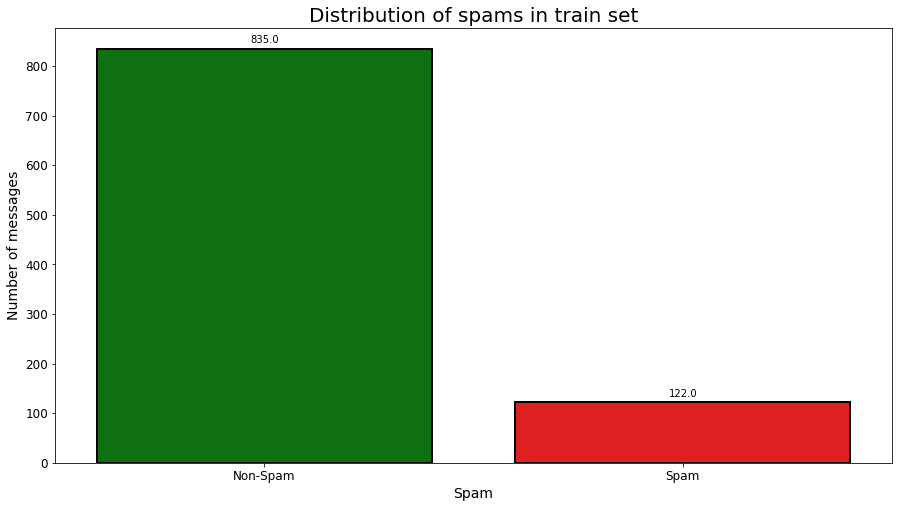

In [11]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=train_df, x='Label',
                      order=train_df['Label'].value_counts().index,
                      palette=['green', 'red'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Non-Spam', 'Spam'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.ylabel('Number of messages', fontsize=14)
plt.xlabel('Spam', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of spams in train set', fontsize=20)

Text(0.5, 1.0, 'Distribution of spams in test set')

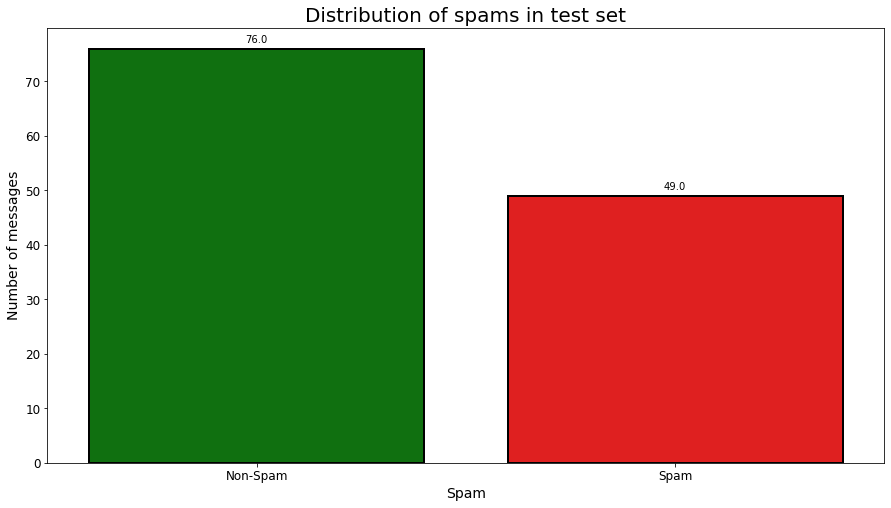

In [12]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=test_df, x='Label',
                      order=test_df['Label'].value_counts().index,
                      palette=['green', 'red'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Non-Spam', 'Spam'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.ylabel('Number of messages', fontsize=14)
plt.xlabel('Spam', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of spams in test set', fontsize=20)

In [13]:
# Get a string of spam mails
spam_mail = ' '.join(spam_mail.lower() for spam_mail in train_df.Message_body[train_df.Label == 'Spam'])

In [14]:
# Get a string of non-spam mails
nonspam_mail = ' '.join(nonspam_mail.lower() for nonspam_mail in train_df.Message_body[train_df.Label == 'Non-Spam'])

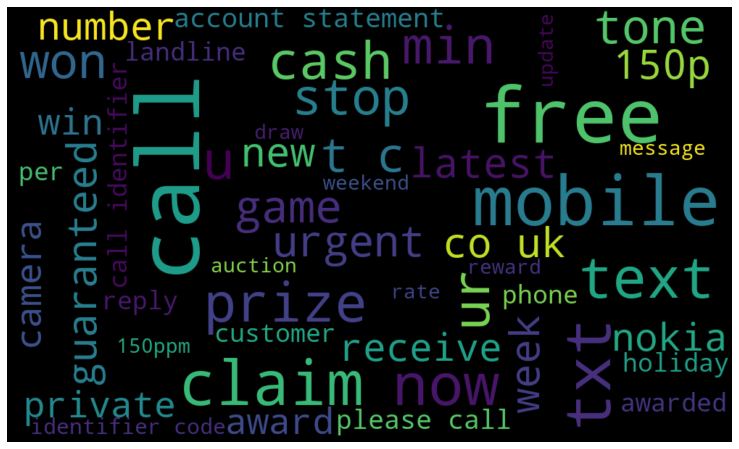

In [15]:
spam_wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 120, max_words = 50).generate(spam_mail)

plt.subplots(figsize=(18,8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

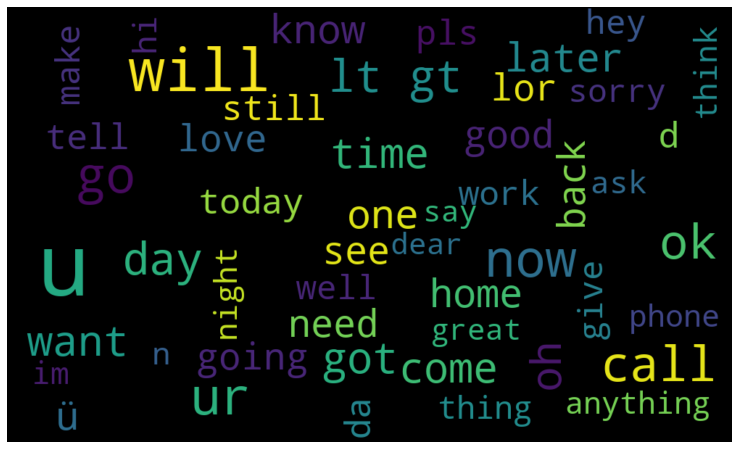

In [16]:
nonspam_wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 120, max_words = 50).generate(nonspam_mail)

plt.subplots(figsize=(18,8))
plt.imshow(nonspam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data preprocessing

In [17]:
# Cleaning the message body from train df
cleaned_train = []

lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

stop_words = stopwords.words('english')
for message_body in train_df['Message_body']:
    
    # Cleaning links
    message_body = re.sub('http\S+', ' ', message_body)
    message_body = re.sub('w{3}', ' ', message_body)
    
    # Cleaning everything except alphabetical and numerical characters
    message_body = re.sub('[^a-zA-Z0-9]', ' ', message_body)
    
    # Tokenizing
    message_body = nltk.word_tokenize(message_body.lower())

    # Lemmatizing
    message_body = [lemma.lemmatize(word) for word in message_body]
    
    # Removing stopwords
    message_body = [word for word in message_body if word not in stop_words]
    
    # Joining
    message_body = ' '.join(message_body)
    
    cleaned_train.append(message_body)

cleaned_train

['rofl true name',
 'guy bitching acted like interested buying something else next week gave u free',
 'pity wa mood suggestion',
 'b going esplanade fr home',
 '2nd time tried 2 contact u u 750 pound prize 2 claim easy call 087187272008 now1 10p per minute bt national rate',
 'reminder o2 get 2 50 pound free call credit detail great offer pls reply 2 text valid name house postcode',
 'huh lei',
 'wait til least wednesday see get',
 'ard 6 like dat lor',
 'ok lor sony ericsson salesman ask shuhui say quite gd 2 use considering',
 'get dump heap mom decided come lowes boring',
 'anything lor juz u lor',
 'next lt gt hour imma flip shit',
 'sorry call later',
 'meant calculation lt gt unit lt gt school really expensive started practicing accent important decided 4years dental school nmde exam',
 'yes u texted pshew missing much',
 'yeh indian wa nice tho kane bit shud go 4 drink sometime soon mite hav 2 go 2 da work 4 laugh soon love pete x x',
 'well keep mind got enough gas one round t

In [18]:
# Cleaning the message body from test df
cleaned_test = []

stop_words = stopwords.words('english')
for message_body in test_df['Message_body']:
    
    # Cleaning links
    message_body = re.sub('http\S+', ' ', message_body)
    message_body = re.sub('w{3}', ' ', message_body)
    
    # Cleaning everything except alphabetical and numerical characters
    message_body = re.sub('[^a-zA-Z0-9]', ' ', message_body)
    
    # Tokenizing
    message_body = nltk.word_tokenize(message_body.lower())

    # Lemmatizing
    message_body = [lemma.lemmatize(word) for word in message_body]
    
    # Removing stopwords
    message_body = [word for word in message_body if word not in stop_words]
    
    # Joining
    message_body = ' '.join(message_body)
    
    cleaned_test.append(message_body)

cleaned_test

['upgrdcentre orange customer may claim free camera phone upgrade loyalty call 0207 153 9153 offer end 26th july c apply opt available',
 'loan purpose 500 75 000 homeowner tenant welcome previously refused still help call free 0800 1956669 text back help',
 'congrats nokia 3650 video camera phone call 09066382422 call cost 150ppm ave call 3mins vary mobile 16 close 300603 post bcm4284 ldn wc1n3xx',
 'urgent mobile number ha awarded 2000 prize guaranteed call 09058094455 land line claim 3030 valid 12hrs',
 'someone ha contacted dating service entered phone fancy find call landline 09111032124 pobox12n146tf150p',
 'send logo 2 ur lover 2 name joined heart txt love name1 name2 mobno eg love adam eve 07123456789 87077 yahoo pobox36504w45wq txtno 4 ad 150p',
 'free entry 250 weekly competition text word win 80086 18 c txttowin co uk',
 '100 dating service cal l 09064012103 box334sk38ch',
 'free ringtone text first 87131 poly text get 87131 true tone help 0845 2814032 16 1st free tone 3x 15

In [19]:
# Create a dataframe from the cleaned train list
cleaned_train_df = pd.DataFrame({'Lemmatized': cleaned_train})
cleaned_train_df

,Lemmatized
0,rofl true name
1,guy bitching acted like interested buying some...
2,pity wa mood suggestion
3,b going esplanade fr home
4,2nd time tried 2 contact u u 750 pound prize 2...
...,...
952,hows favourite person today r u workin hard sl...
953,much got cleaning
954,sorry da gone mad many pending work
955,wat time finish


In [20]:
# Create a dataframe from the cleaned test list
cleaned_test_df = pd.DataFrame({'Lemmatized': cleaned_test})
cleaned_test_df

,Lemmatized
0,upgrdcentre orange customer may claim free cam...
1,loan purpose 500 75 000 homeowner tenant welco...
2,congrats nokia 3650 video camera phone call 09...
3,urgent mobile number ha awarded 2000 prize gua...
4,someone ha contacted dating service entered ph...
...,...
120,7 wonder world 7th 6th ur style 5th ur smile 4...
121,try something dear read something exam
122,sun ah thk mayb dun anythin thk book e lesson ...
123,symptom u love 1 u like listening song 2 u get...


In [21]:
# Train test split
data_labels = train_df['Label']
data_lemma = cleaned_train_df['Lemmatized']

X = cleaned_test_df['Lemmatized']
y = test_df['Label']

X_train, X_test, y_train, y_test = train_test_split(data_lemma, data_labels, random_state = 42)

## Multinomial Naive Bayes

In [22]:
pipe_mnnb = Pipeline(steps = [('tf', TfidfVectorizer()), ('mnnb', MultinomialNB())])

# Create Parameter Grid
pgrid_mnnb = {
    'tf__max_features' : [1000, 2000, 3000],
    'tf__stop_words' : ['english', None],
    'tf__ngram_range' : [(1,1), (1,2)],
    'tf__use_idf' : [True, False],
    'mnnb__alpha' : [0.1, 0.5, 1]
}

# Apply GridSearch to Pipeline to find the best parameters
gs_mnnb = GridSearchCV(pipe_mnnb, pgrid_mnnb, cv=5, n_jobs=-1, verbose=2)

# Fit the model
gs_mnnb.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END mnnb__alpha=0.1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__stop_words=english, tf__use_idf=True; total time=   0.0s
[CV] END mnnb__alpha=0.1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__stop_words=english, tf__use_idf=False; total time=   0.0s
[CV] END mnnb__alpha=0.1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__stop_words=english, tf__use_idf=True; total time=   0.0s
[CV] END mnnb__alpha=0.1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__stop_words=english, tf__use_idf=True; total time=   0.0s
[CV] END mnnb__alpha=0.1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__stop_words=english, tf__use_idf=False; total time=   0.0s
[CV] END mnnb__alpha=0.1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__stop_words=english, tf__use_idf=True; total time=   0.0s
[CV] END mnnb__alpha=0.1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__stop_words=english, tf__use_idf=False; total time=   0.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('mnnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'mnnb__alpha': [0.1, 0.5, 1],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__stop_words': ['english', None],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [23]:
# Check the best parameters for our model
gs_mnnb.best_params_

{'mnnb__alpha': 0.1,
 'tf__max_features': 2000,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': None,
 'tf__use_idf': True}

In [24]:
print('Score of train set', gs_mnnb.score(X_train, y_train))
print('Score of test set', gs_mnnb.score(X_test, y_test))

Score of train set 0.99860529986053
Score of test set 0.9541666666666667


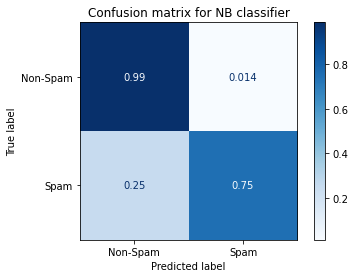

In [25]:
## Naive Bayes Predictions on val set and confusion matrix
preds_mnnb = gs_mnnb.predict(X)
test_df['Predictions'] = preds_mnnb

# Generate confusion matrix
matrix_nb = plot_confusion_matrix(gs_mnnb, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

plt.title('Confusion matrix for NB classifier')
plt.show(matrix_nb)
plt.show()

## Logistic Regression

In [26]:
pipe_lgrg = Pipeline(steps = [('tf', TfidfVectorizer()), ('lgrg', LogisticRegression())])

# Create Parameter Grid
pgrid_lgrg = {
    'tf__max_features' : [1000, 2000, 3000],
    'tf__ngram_range' : [(1,1), (1,2)],
    'tf__use_idf' : [True, False],
    'lgrg__penalty' : ['l1', 'l2', 'elasticnet'],
    'lgrg__class_weight' : ['balanced', None],
    'lgrg__C' : [1.0, 0.9]
}

In [27]:
# Apply GridSearch to Pipeline to find the best parameters
gs_lgrg = GridSearchCV(pipe_lgrg, pgrid_lgrg, cv=5, n_jobs=-1, verbose=2)

# Fit the model
gs_lgrg.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END lgrg__C=1.0, lgrg__class_weight=balanced, lgrg__penalty=l1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=True; total time=   0.0s
[CV] END lgrg__C=1.0, lgrg__class_weight=balanced, lgrg__penalty=l1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=True; total time=   0.0s
[CV] END lgrg__C=1.0, lgrg__class_weight=balanced, lgrg__penalty=l1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=False; total time=   0.0s
[CV] END lgrg__C=1.0, lgrg__class_weight=balanced, lgrg__penalty=l1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=True; total time=   0.0s
[CV] END lgrg__C=1.0, lgrg__class_weight=balanced, lgrg__penalty=l1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=False; total time=   0.0s
[CV] END lgrg__C=1.0, lgrg__class_weight=balanced, lgrg__penalty=l1, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=True; total time=   0.0s
[CV] END lgrg__C=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('lgrg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lgrg__C': [1.0, 0.9],
                         'lgrg__class_weight': ['balanced', None],
                         'lgrg__penalty': ['l1', 'l2', 'elasticnet'],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [28]:
gs_lgrg.best_params_

{'lgrg__C': 1.0,
 'lgrg__class_weight': 'balanced',
 'lgrg__penalty': 'l2',
 'tf__max_features': 2000,
 'tf__ngram_range': (1, 2),
 'tf__use_idf': True}

In [29]:
print('Score of train set', gs_lgrg.score(X_train, y_train))
print('Score of test set', gs_lgrg.score(X_test, y_test))

Score of train set 0.99302649930265
Score of test set 0.9541666666666667


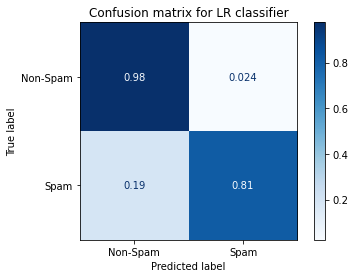

In [30]:
## LR Predictions on val set and confusion matrix
preds_lgrg = gs_lgrg.predict(X)
test_df['Predictions'] = preds_lgrg

#conf_lgrg = confusion_matrix(val_y, preds_lgrg)
#conf_lgrg

# Generate confusion matrix
matrix_lr = plot_confusion_matrix(gs_lgrg, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

plt.title('Confusion matrix for LR classifier')
plt.show(matrix_lr)
plt.show()

## Support Vector Classification

In [31]:
pipe_svc = Pipeline(steps = [('tf', TfidfVectorizer()), ('svc', SVC())])

# Create Parameter Grid
pgrid_svc = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
 'svc__decision_function_shape' : ['ovo', 'ovr'],
 'svc__C' : [1.0, 0.9, 0.8, 0.7]
}

# Apply GridSearch to Pipeline to find the best parameters
gs_svc = GridSearchCV(pipe_svc, pgrid_svc, cv=5, n_jobs=-1, verbose=2)

# Fit the model
gs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END svc__C=1.0, svc__decision_function_shape=ovo, svc__kernel=linear, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=True; total time=   0.0s
[CV] END svc__C=1.0, svc__decision_function_shape=ovo, svc__kernel=linear, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=True; total time=   0.0s
[CV] END svc__C=1.0, svc__decision_function_shape=ovo, svc__kernel=linear, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=True; total time=   0.0s
[CV] END svc__C=1.0, svc__decision_function_shape=ovo, svc__kernel=linear, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=False; total time=   0.0s
[CV] END svc__C=1.0, svc__decision_function_shape=ovo, svc__kernel=linear, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=False; total time=   0.0s
[CV] END svc__C=1.0, svc__decision_function_shape=ovo, svc__kernel=linear, tf__max_features=1000, tf__ngram_range=(1, 1), tf__use_idf=True;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [1.0, 0.9, 0.8, 0.7],
                         'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed'],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [32]:
gs_svc.best_params_

{'svc__C': 1.0,
 'svc__decision_function_shape': 'ovo',
 'svc__kernel': 'linear',
 'tf__max_features': 3000,
 'tf__ngram_range': (1, 2),
 'tf__use_idf': True}

In [33]:
print('Score of train set', gs_svc.score(X_train, y_train))
print('Score of test set', gs_svc.score(X_test, y_test))

Score of train set 0.99860529986053
Score of test set 0.9625


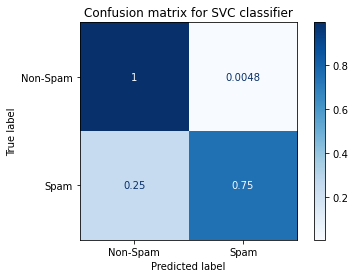

In [34]:
## LR Predictions on val set and confusion matrix
preds_svc = gs_svc.predict(X)
test_df['Predictions'] = preds_svc

# Generate confusion matrix
matrix_svc = plot_confusion_matrix(gs_svc, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

plt.title('Confusion matrix for SVC classifier')
plt.show(matrix_svc)
plt.show()

## Best model

In [35]:
# List with our trained models
models = []

models.append(gs_mnnb)
models.append(gs_lgrg)
models.append(gs_svc)

# Build a list of (score, model) tuples
scores = [(model.score(X_test, y_test), model) for model in models]

# Sort it on score
scores = sorted(scores, key=lambda x: x[0], reverse=True)

print('Results for the three models: ')
for item in scores:
    print('The model {} has reached {} accuracy on test set'.format(item[1].estimator[1], round(item[0], 2)))

Results for the three models: 
The model SVC() has reached 0.96 accuracy on test set
The model MultinomialNB() has reached 0.95 accuracy on test set
The model LogisticRegression() has reached 0.95 accuracy on test set
